## Importando librerías

In [ ]:
#Keras librarys
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D, Flatten, Dense, Dropout, Activation, BatchNormalization
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 

## Cargando dataset

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


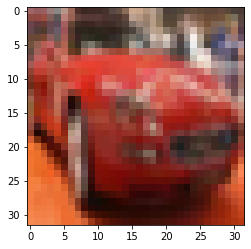

In [ ]:
plt.imshow(x_train[5])

## Limpieza de datos

In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [ ]:
num_clases = len(np.unique(y_train))
y_train = to_categorical(y_train, num_clases)
y_test = to_categorical(y_test, num_clases)

In [ ]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

### Normalization

In [ ]:
mean = np.mean(x_train)
std = np.std(x_train)

In [ ]:
x_train = (x_train - mean) / (std+1e-7)
x_test = (x_test - mean) / (std+1e-7)

## Creando set de datos

In [ ]:
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

print('x_train shape', x_train.shape)

print('train;', x_train.shape[0])
print('val;', x_valid.shape[0])
print('test;', x_test.shape[0])

x_train shape (45000, 32, 32, 3)
train; 45000
val; 5000
test; 10000


## Construyendo nuestro modelo convolucional

In [ ]:
base_filtros = 32
w_regulatizer = 1e-4

In [ ]:
x_train.shape[1:]

(32, 32, 3)

In [ ]:
model = Sequential()
## conv 1
model.add(Conv2D(base_filtros, (3,3), padding='same', kernel_regularizer=regularizers.l2(w_regulatizer), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())

## conv 2
model.add(Conv2D(base_filtros, (3,3), padding='same', kernel_regularizer=regularizers.l2(w_regulatizer)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

## conv 3
model.add(Conv2D(2*base_filtros, (3,3), padding='same', kernel_regularizer=regularizers.l2(w_regulatizer)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

## conv 4
model.add(Conv2D(2*base_filtros, (3,3), padding='same', kernel_regularizer=regularizers.l2(w_regulatizer)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

## conv 5
model.add(Conv2D(4*base_filtros, (3,3), padding='same', kernel_regularizer=regularizers.l2(w_regulatizer)))
model.add(Activation('relu'))
model.add(BatchNormalization())


## conv 6
model.add(Conv2D(4*base_filtros, (3,3), padding='same', kernel_regularizer=regularizers.l2(w_regulatizer)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

## Clasificacion - Flatten

model.add(Flatten())
model.add(Dense(num_clases,activation='softmax'))

model.summary()



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 activation_6 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 batch_normalization_6 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 activation_7 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 batch_normalization_7 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                      

## Data augmentation

In [ ]:
datagen = ImageDataGenerator(rotation_range=15,
                  width_shift_range=0.1,
                  height_shift_range=0.1,
                  horizontal_flip=True,
                  vertical_flip=True)

## Compilando

In [ ]:
from tensorflow.keras import optimizers

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=optimizers.Adam(),
             metrics=['accuracy'])

In [ ]:
#hist = model.fit(x_train, y_train, batch_size=32,epochs=100,
#                validation_data=(x_valid, y_valid),
#                verbose=2, shuffle=True)

## Callbacks

In [ ]:
chekcpoint = ModelCheckpoint('mi_mejor_modelo.hdf5',verbose=1,save_best_only=True, monitor = 'val_accuracy')

## Entrenando nuestro modelo

In [ ]:
hist = model.fit(datagen.flow(x_train, y_train, batch_size=128),
          callbacks=[chekcpoint],
          steps_per_epoch=x_train.shape[0] // 128, 
          epochs=120,
          verbose=2,
          validation_data=(x_valid, y_valid)
         )

2021-11-11 17:42:29.234920: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-11-11 17:42:29.239117: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2000155000 Hz


Epoch 1/120


2021-11-11 17:42:30.400796: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.11
2021-11-11 17:42:31.177938: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.11
2021-11-11 17:42:31.204998: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.8


351/351 - 29s - loss: 2.2515 - accuracy: 0.3210 - val_loss: 2.0859 - val_accuracy: 0.3232

Epoch 00001: val_accuracy improved from -inf to 0.32320, saving model to mi_mejor_modelo.hdf5
Epoch 2/120
351/351 - 22s - loss: 1.6939 - accuracy: 0.4333 - val_loss: 1.6103 - val_accuracy: 0.4680

Epoch 00002: val_accuracy improved from 0.32320 to 0.46800, saving model to mi_mejor_modelo.hdf5
Epoch 3/120
351/351 - 21s - loss: 1.4884 - accuracy: 0.5028 - val_loss: 1.4405 - val_accuracy: 0.5324

Epoch 00003: val_accuracy improved from 0.46800 to 0.53240, saving model to mi_mejor_modelo.hdf5
Epoch 4/120
351/351 - 21s - loss: 1.3515 - accuracy: 0.5451 - val_loss: 1.1549 - val_accuracy: 0.6102

Epoch 00004: val_accuracy improved from 0.53240 to 0.61020, saving model to mi_mejor_modelo.hdf5
Epoch 5/120
351/351 - 21s - loss: 1.2626 - accuracy: 0.5733 - val_loss: 1.2492 - val_accuracy: 0.5972

Epoch 00005: val_accuracy did not improve from 0.61020
Epoch 6/120
351/351 - 20s - loss: 1.1903 - accuracy: 0.59

## Resultados

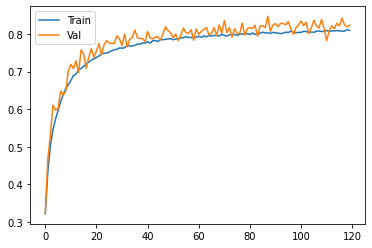

In [ ]:
plt.plot(hist.history['accuracy'],label='Train')
plt.plot(hist.history['val_accuracy'],label='Val')
plt.legend()
plt.show()

In [ ]:
model2 = model

In [ ]:
model2.load_weights('./mi_mejor_modelo.hdf5')

In [ ]:
model2.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.6269 - accuracy: 0.8362


[0.6269497871398926, 0.8361999988555908]